In [1]:
import pandas as pd


file_path = r'C:\Users\user\Downloads\dengue-fever-cases-by-province-2015-2017-xlsx-1.xlsx'
df = pd.read_excel(file_path, sheet_name='Dengue fever')


df_cleaned = df.copy()
df_cleaned.columns = [
    'Index', 'Pcode', 'Province', '2015_Cases', '2015_Incidence_rate', '2015_Death', 
    '2015_CFR', '2016_Cases', '2016_Incidence_rate', '2016_Death', '2016_CFR',
    '2017_Cases', '2017_Incidence_rate', '2017_Death', '2017_CFR'
]
df_cleaned = df_cleaned.drop(0).reset_index(drop=True)
df_cleaned = df_cleaned.drop(columns=['Index'])


numeric_columns = [
    '2015_Cases', '2015_Incidence_rate', '2015_Death', '2015_CFR',
    '2016_Cases', '2016_Incidence_rate', '2016_Death', '2016_CFR',
    '2017_Cases', '2017_Incidence_rate', '2017_Death', '2017_CFR'
]
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].apply(pd.to_numeric, errors='coerce')


df_cleaned.head()

,Pcode,Province,2015_Cases,2015_Incidence_rate,2015_Death,2015_CFR,2016_Cases,2016_Incidence_rate,2016_Death,2016_CFR,2017_Cases,2017_Incidence_rate,2017_Death,2017_CFR
0,11,Aceh,1509.0,30.17,6.0,0.40,2651.0,52.02,21.0,0.79,2591.0,49.93,12.0,0.46
1,12,Sumatera Utara,5274.0,37.84,30.0,0.57,8618.0,61.11,46.0,0.53,5327.0,37.35,29.0,0.54
2,13,Sumatera Barat,3806.0,73.24,22.0,0.58,3985.0,75.75,18.0,0.45,2470.0,46.42,7.0,0.28
3,14,Riau,3261.0,51.40,22.0,0.67,4170.0,64.14,39.0,0.94,1928.0,28.96,15.0,0.78
4,15,Jambi,1354.0,39.80,8.0,0.59,1553.0,44.90,14.0,0.90,378.0,10.75,2.0,0.53


In [2]:
summary_statistics = df_cleaned.describe()


cases_trend = df_cleaned[['Province', '2015_Cases', '2016_Cases', '2017_Cases']].set_index('Province')


correlation_2017 = df_cleaned[['2017_Cases', '2017_Death', '2017_CFR']].corr()


summary_statistics, cases_trend, correlation_2017

(          2015_Cases  2015_Incidence_rate   2015_Death   2015_CFR  \
 count      35.000000            35.000000    35.000000  35.000000   
 mean     7408.571429            55.108857    61.200000   1.274857   
 std     21921.829796            49.544993   186.019733   1.636428   
 min        66.000000             4.630000     0.000000   0.000000   
 25%       724.500000            28.030000     6.000000   0.465000   
 50%      1571.000000            45.470000    15.000000   0.830000   
 75%      3890.000000            57.310000    29.000000   1.380000   
 max    129650.000000           257.750000  1071.000000   7.690000   
 
           2016_Cases  2016_Incidence_rate   2016_Death   2016_CFR  \
 count      35.000000            35.000000    35.000000  35.000000   
 mean    11666.914286            89.454000    91.314286   1.038286   
 std     34478.757205            94.014448   272.842421   1.010758   
 min       105.000000            11.750000     0.000000   0.000000   
 25%      1092.500

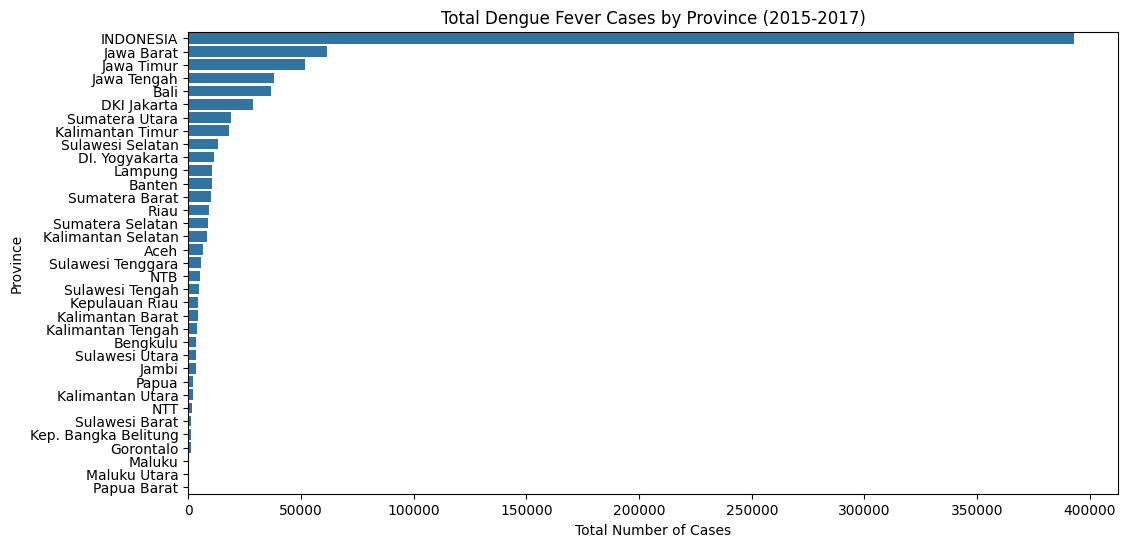

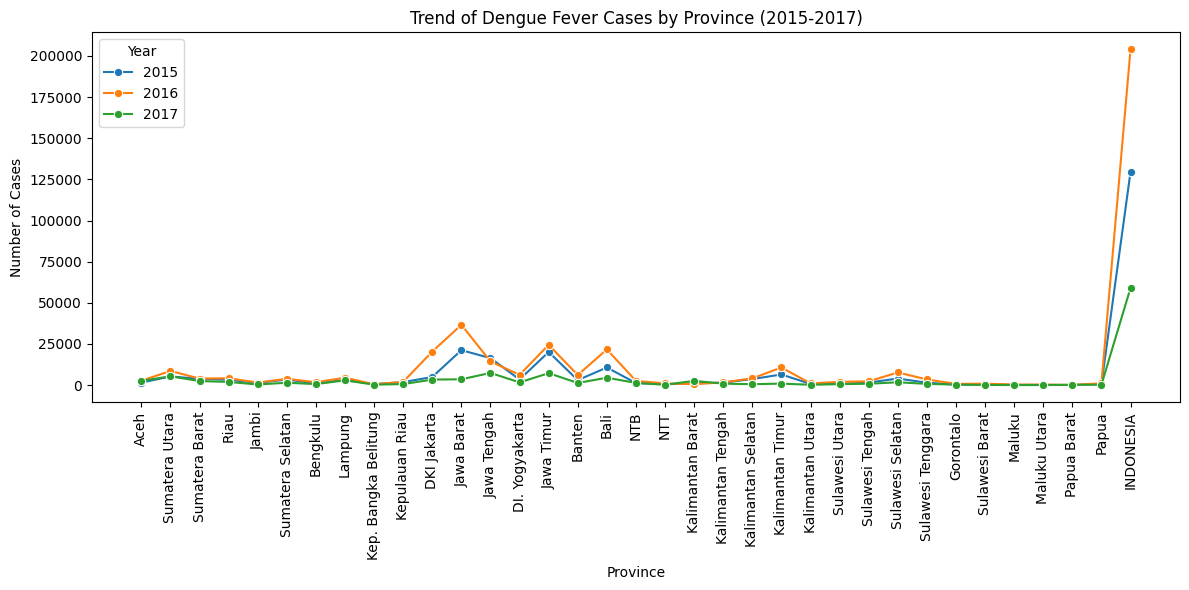

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_cleaned is already defined and cleaned

# Calculate total dengue cases by province for the years 2015-2017
df_cleaned['Total_Cases'] = df_cleaned['2015_Cases'] + df_cleaned['2016_Cases'] + df_cleaned['2017_Cases']

# Bar plot for total dengue cases per province (2015-2017)
plt.figure(figsize=(12, 6))
sns.barplot(x='Total_Cases', y='Province', data=df_cleaned.sort_values(by='Total_Cases', ascending=False))
plt.title('Total Dengue Fever Cases by Province (2015-2017)')
plt.xlabel('Total Number of Cases')
plt.ylabel('Province')
plt.show()

df_melted = df_cleaned.melt(id_vars=['Province'], 
                             value_vars=['2015_Cases', '2016_Cases', '2017_Cases'], 
                             var_name='Year', 
                             value_name='Cases')

# Extract year from the variable using a raw string
df_melted['Year'] = df_melted['Year'].str.extract(r'(\d+)')

# Convert year to a categorical variable for better plotting
df_melted['Year'] = df_melted['Year'].astype(str)

# Line plot to show the trend of dengue cases over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melted, x='Province', y='Cases', hue='Year', marker='o')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Trend of Dengue Fever Cases by Province (2015-2017)')
plt.xlabel('Province')
plt.ylabel('Number of Cases')
plt.legend(title='Year')
plt.tight_layout()
plt.show()